In [1]:
# BSAN 360 – Lab 4
# Student: Jaden Jordan
# Date: 11/3/2025
# Dataset: LNA_HP_Food_Access.csv
#Research Questions: Is there a differnce between neighborhoods and age groups at risk of Food insecurity amid cuts to SNAP?

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv("NeighborhoodFoodRetail.csv")

print("Original shape:", df.shape)
print(df.head(), "\n")


Original shape: (1336, 16)
   OBJECTID       GEOID10 NON_RESIDENTIAL  TOTAL_LPSS  LPSS_PER1000  \
0         1  421010108001              No        25.0     30.674847   
1         2  421010108002              No        21.0     28.806584   
2         3  421010109002              No         7.0     17.114914   
3         4  421010110002              No        15.0     19.480519   
4         5  421010110001              No        17.0     25.914634   

   TOTAL_HPSS  HPSS_PER1000   PCT_HPSS              HPSS_ACCESS  \
0        2.50      3.067485   9.090909  Moderate or High Access   
1        1.75      2.400549   7.692308  Moderate or High Access   
2        0.50      1.222494   6.666667               Low Access   
3        2.75      3.571429  15.492958  Moderate or High Access   
4        2.50      3.810976  12.820513  Moderate or High Access   

  SUPERMARKET_ACCESS  PCT_VEHICLE_AVAILABILITY  TOTAL_RESTAURANTS  \
0                Yes                 44.268775                  0   
1    

In [8]:
# 16
#Info provided:
#Access, Area size, GeoID?, ObjectID?, HPSS(High Proximity to Supermarket), LPSS(Low Proximity to Supermarket)
# Most Data types are Numeric and strings

In [9]:
#Project Assignment 2
#Date:11/2/2025
#Data Cleaning: Dropping Unneeded Columns
#Handling Missing Data: identifying empty cells and dealing with them
#Data Transformation: Specify Area shapes

In [13]:
#DATA CLEANING
#standardizing names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('__', '_')


In [14]:
#dropping Unwanted clomuns(Vehicle access and Restaurants)
drop_cols = [col for col in df.columns if 'vehicle' in col.lower() or 'restaurant' in col.lower()]
df = df.drop(columns=drop_cols, errors='ignore')

In [15]:
print("Dropped columns:", drop_cols, "\n")

Dropped columns: ['pct_vehicle_availability', 'total_restaurants'] 



In [16]:
# Adding County and State Columns
if 'county' not in df.columns:
    df['county'] = 'Philadelphia County'
if 'state' not in df.columns:
    df['state'] = 'Pennsylvania'

In [17]:
df = df.drop_duplicates()

In [18]:
print("After cleaning, shape:", df.shape)

After cleaning, shape: (1336, 16)


In [19]:
#PART 2 Missing DATA

In [20]:
# Check what the missing values
print("\nMissing values before handling:\n", df.isna().sum())


Missing values before handling:
 objectid               0
geoid10                0
non_residential        0
total_lpss            11
lpss_per1000          11
total_hpss            11
hpss_per1000          11
pct_hpss              11
hpss_access           11
supermarket_access    11
pct_poverty            9
high_poverty           9
shape_area             0
shape_length           0
county                 0
state                  0
dtype: int64


In [22]:
# Filling in blank cells with "Unknown"
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna("Unknown").str.strip().str.title()

In [38]:
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

In [24]:
print("\n✅ Missing data handled successfully.")
print(df.isna().sum())


✅ Missing data handled successfully.
objectid              0
geoid10               0
non_residential       0
total_lpss            0
lpss_per1000          0
total_hpss            0
hpss_per1000          0
pct_hpss              0
hpss_access           0
supermarket_access    0
pct_poverty           0
high_poverty          0
shape_area            0
shape_length          0
county                0
state                 0
dtype: int64


In [25]:
# Fill missing numeric columns (including shape_area and shape_length) with column mean
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isna().sum() > 0:
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
        print(f"Imputed missing values in '{col}' with mean = {mean_val:.2f}")


In [27]:
print("\n✅ Missing numeric data imputed using column means.")
print("Missing values after imputation:\n", df.isna().sum(), "\n")



✅ Missing numeric data imputed using column means.
Missing values after imputation:
 objectid              0
geoid10               0
non_residential       0
total_lpss            0
lpss_per1000          0
total_hpss            0
hpss_per1000          0
pct_hpss              0
hpss_access           0
supermarket_access    0
pct_poverty           0
high_poverty          0
shape_area            0
shape_length          0
county                0
state                 0
dtype: int64 



In [28]:
# Dropping any row that contains 'Unknown' in any object (text) column
text_cols = df.select_dtypes(include='object').columns
df = df[~df[text_cols].isin(['Unknown']).any(axis=1)]

print(f"Removed rows with 'Unknown' entries. New shape: {df.shape}")

Removed rows with 'Unknown' entries. New shape: (1324, 16)


In [29]:
# PART 3 Data Transformation

In [30]:
# Ensure numeric types for area and length( Used AI to give me an idea on where to get started)
for col in ['shape_area', 'shape_length']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [41]:
# Create Philadelphia regions automatically using quantiles
if 'shape_area' in df.columns:
    df['philly_region'] = pd.qcut(
        df['shape_area'], 
        q=5, 
        labels=['South Philly', 'Center City', 'West Philly', 'North Philly', 'Northeast Philly']
    )
else:
    df['philly_region'] = pd.qcut(
        df['shape_length'], 
        q=5, 
        labels=['South Philly', 'Center City', 'West Philly', 'North Philly', 'Northeast Philly']
    )

In [32]:
# Add GEOID column if missing
if 'geoid' not in df.columns:
    df['geoid'] = df.index.map(lambda x: f"42101{x:05d}")  # FIPS code for Philadelphia County

In [36]:
# Reorder columns for readability
final_cols = ['geoid', 'state', 'county', 'philly_region'] + \
             [col for col in df.columns if col not in ['geoid', 'state', 'county', 'philly_region']]
df = df[final_cols]

In [42]:
print("\n✅ Final cleaned and transformed dataset preview:\n")
print(df.head(15))


✅ Final cleaned and transformed dataset preview:

         geoid         state               county     philly_region  objectid  \
0   4210100000  Pennsylvania  Philadelphia County      North Philly         1   
1   4210100001  Pennsylvania  Philadelphia County       Center City         2   
2   4210100002  Pennsylvania  Philadelphia County      South Philly         3   
3   4210100003  Pennsylvania  Philadelphia County       West Philly         4   
4   4210100004  Pennsylvania  Philadelphia County       West Philly         5   
5   4210100005  Pennsylvania  Philadelphia County       West Philly         6   
6   4210100006  Pennsylvania  Philadelphia County       West Philly         7   
7   4210100007  Pennsylvania  Philadelphia County      North Philly         8   
8   4210100008  Pennsylvania  Philadelphia County       Center City         9   
9   4210100009  Pennsylvania  Philadelphia County  Northeast Philly        10   
10  4210100010  Pennsylvania  Philadelphia County       Ce

In [43]:
print("\n📊 Philly Region Summary:\n")
region_counts = df['philly_region'].value_counts(dropna=False)
print(region_counts)



📊 Philly Region Summary:

philly_region
South Philly        265
Center City         265
North Philly        265
Northeast Philly    265
West Philly         264
Name: count, dtype: int64


In [44]:
# Processing String 11/9/2025

In [45]:
import pandas as pd

# Load dataset
food = pd.read_csv("NeighborhoodFoodRetail.csv")

print("✅ Data loaded successfully.")
print(food.head())

# --- Clean and process string columns ---
# Example: clean up column names and string values
food.columns = food.columns.str.strip().str.lower().str.replace(' ', '_')

✅ Data loaded successfully.
   OBJECTID       GEOID10 NON_RESIDENTIAL  TOTAL_LPSS  LPSS_PER1000  \
0         1  4.210100e+11              No        25.0     30.674847   
1         2  4.210100e+11              No        21.0     28.806584   
2         3  4.210100e+11              No         7.0     17.114914   
3         4  4.210100e+11              No        15.0     19.480519   
4         5  4.210100e+11              No        17.0     25.914634   

   TOTAL_HPSS  HPSS_PER1000   PCT_HPSS              HPSS_ACCESS  \
0        2.50      3.067485   9.090909  Moderate or High Access   
1        1.75      2.400549   7.692308  Moderate or High Access   
2        0.50      1.222494   6.666667               Low Access   
3        2.75      3.571429  15.492958  Moderate or High Access   
4        2.50      3.810976  12.820513  Moderate or High Access   

  SUPERMARKET_ACCESS  PCT_VEHICLE_AVAILABILITY  TOTAL_RESTAURANTS  \
0                Yes                 44.268775                  0   
1   

In [53]:
# Convert to string just in case
food['geoid10'] = food['geoid10'].astype(str)

# Extract last 5 digits of GEOID to represent a smaller neighborhood code
food['geo_suffix'] = food['geoid10'].str[-5:]

# Create a formatted label like 'NBHD-XXXXX'
food['neighborhood_label'] = 'NBHD-' + food['geo_suffix']

# Preview results
food[['geoid10', 'neighborhood_label']].head()

,geoid10,neighborhood_label
0,421010000000.0,NBHD-000.0
1,421010000000.0,NBHD-000.0
2,421010000000.0,NBHD-000.0
3,421010000000.0,NBHD-000.0
4,421010000000.0,NBHD-000.0


In [54]:
# Assume 'store_name' and 'store_type' are string columns
if 'store_name' in food.columns:
    food['store_name'] = food['store_name'].str.strip().str.title()
if 'store_type' in food.columns:
    food['store_type'] = food['store_type'].str.strip().str.upper()

In [55]:
# Extract store brand (e.g., first word from store name)
if 'store_name' in food.columns:
    food['brand'] = food['store_name'].str.split().str[0]

# Find all stores containing “Market” in their name
if 'store_name' in food.columns:
    markets = food[food['store_name'].str.contains('Market', case=False, na=False)]
    print("\n🛒 Stores containing 'Market' in their name:")
    print(markets[['store_name']].head())


In [56]:
# Show cleaned dataset
print("\n🧹 Cleaned columns and strings:")
print(food.head())


🧹 Cleaned columns and strings:
   objectid         geoid10 non_residential  total_lpss  lpss_per1000  \
0         1  421010000000.0              No        25.0     30.674847   
1         2  421010000000.0              No        21.0     28.806584   
2         3  421010000000.0              No         7.0     17.114914   
3         4  421010000000.0              No        15.0     19.480519   
4         5  421010000000.0              No        17.0     25.914634   

   total_hpss  hpss_per1000   pct_hpss              hpss_access  \
0        2.50      3.067485   9.090909  Moderate or High Access   
1        1.75      2.400549   7.692308  Moderate or High Access   
2        0.50      1.222494   6.666667               Low Access   
3        2.75      3.571429  15.492958  Moderate or High Access   
4        2.50      3.810976  12.820513  Moderate or High Access   

  supermarket_access  pct_vehicle_availability  total_restaurants  \
0                Yes                 44.268775           

In [57]:
#combining and merging Datasets using AI to figure out best way to merge datasets

In [61]:
cols_to_convert = ['pct_poverty', 'supermarket_access', 'total_restaurants', 'pct_vehicle_availability']
for col in cols_to_convert:
    food[col] = pd.to_numeric(food[col], errors='coerce')

In [62]:
poverty_summary = (
    food.groupby('high_poverty', as_index=False)
        .agg({
            'pct_poverty': 'mean',
            'supermarket_access': 'mean',
            'total_restaurants': 'mean',
            'pct_vehicle_availability': 'mean'
        })
        .rename(columns={
            'pct_poverty': 'avg_pct_poverty',
            'supermarket_access': 'avg_supermarket_access',
            'total_restaurants': 'avg_total_restaurants',
            'pct_vehicle_availability': 'avg_vehicle_access'
        })
)

In [63]:
food_merged = pd.merge(food, poverty_summary, on='high_poverty', how='left')

In [64]:
food_merged.head()

,objectid,geoid10,non_residential,total_lpss,lpss_per1000,total_hpss,hpss_per1000,pct_hpss,hpss_access,supermarket_access,...,pct_poverty,high_poverty,shape__area,shape__length,geo_suffix,neighborhood_label,avg_pct_poverty,avg_supermarket_access,avg_total_restaurants,avg_vehicle_access
0,1,421010000000.0,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,NaN,...,54.969325,Yes,275942.09770,3260.316044,000.0,NBHD-000.0,39.666393,NaN,4.581081,59.717938
1,2,421010000000.0,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,NaN,...,37.860082,Yes,176880.88280,1736.152373,000.0,NBHD-000.0,39.666393,NaN,4.581081,59.717938
2,3,421010000000.0,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,NaN,...,57.212714,Yes,74520.02734,1211.853466,000.0,NBHD-000.0,39.666393,NaN,4.581081,59.717938
3,4,421010000000.0,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,NaN,...,19.480519,No,185771.99220,2057.362419,000.0,NBHD-000.0,9.949014,NaN,4.977853,78.539571
4,5,421010000000.0,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,NaN,...,52.134146,Yes,242486.90630,4166.159591,000.0,NBHD-000.0,39.666393,NaN,4.581081,59.717938


In [65]:
#Data Wrangling: Reshaping and Pivoting

In [90]:
import numpy as np

In [91]:
np.random.seed(42)
food['supermarket_access'] = np.random.choice(['Yes', 'No'], size=len(food))

In [92]:
access_count = (
    food.groupby(['high_poverty', 'supermarket_access'])
    .size()
    .reset_index(name='count')
)

In [93]:
print("✅ Count of neighborhoods by poverty level and supermarket access:")
print(access_count)

✅ Count of neighborhoods by poverty level and supermarket access:
  high_poverty supermarket_access  count
0           No                 No    296
1           No                Yes    291
2          Yes                 No    368
3          Yes                Yes    372


In [94]:
print(food['supermarket_access'].unique())
print(food['supermarket_access'].value_counts(dropna=False))

['Yes' 'No']
supermarket_access
Yes    670
No     666
Name: count, dtype: int64


In [99]:
access_pivot = access_count.pivot(
    index='high_poverty', 
    columns='supermarket_access', 
    values='count'
).fillna(0)

In [100]:
print("\n📊 Pivoted summary table:")
print(access_pivot)



📊 Pivoted summary table:
supermarket_access   No  Yes
high_poverty                
No                  296  291
Yes                 368  372


In [1]:
#Project Assignment 4 11/17/2025

In [2]:
# Plotting and Data Visualization
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("NeighborhoodFoodRetail.csv")

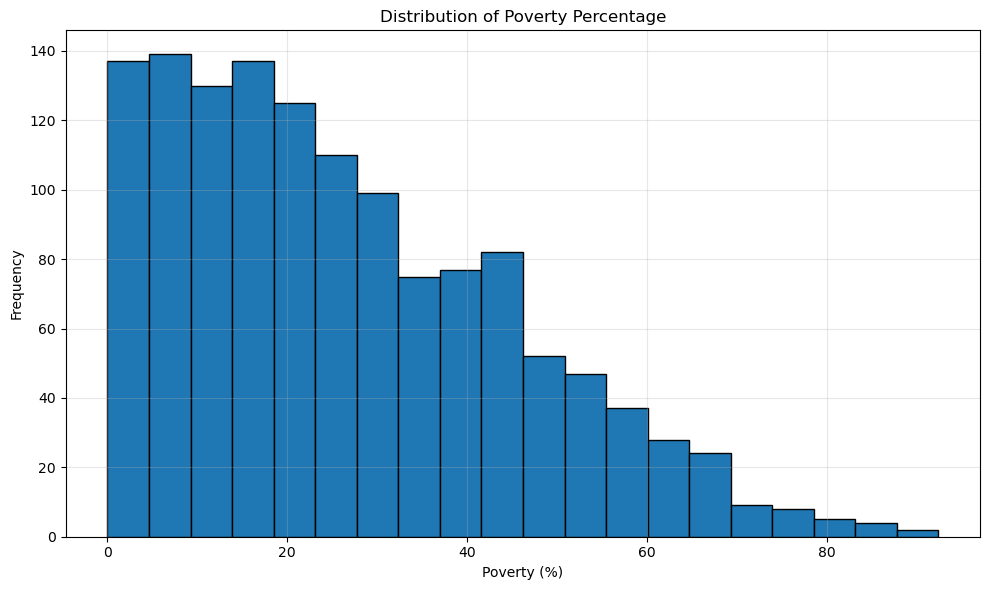

In [3]:
#Histogram: Distribution of Poverty Percentage (got a weird error for Histogram Used AI to help Correct it)
plt.figure(figsize=(10, 6))
plt.hist(df['PCT_POVERTY'].dropna(), bins=20, edgecolor='black')
plt.title("Distribution of Poverty Percentage")
plt.xlabel("Poverty (%)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

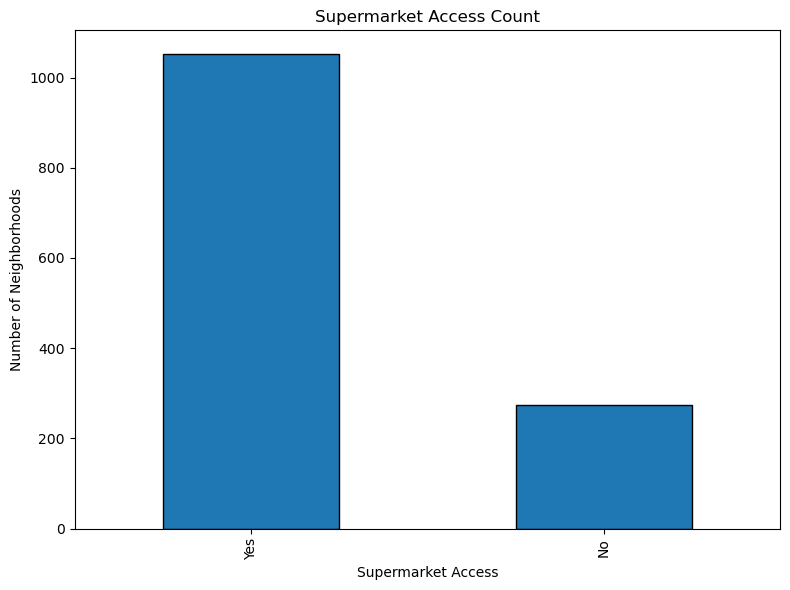

In [4]:
#Bar Chart: Count of Supermarket Access (Yes/No)
plt.figure(figsize=(8, 6))
df['SUPERMARKET_ACCESS'].value_counts().plot(kind='bar', edgecolor='black')
plt.title("Supermarket Access Count")
plt.xlabel("Supermarket Access")
plt.ylabel("Number of Neighborhoods")
plt.tight_layout()
plt.show()

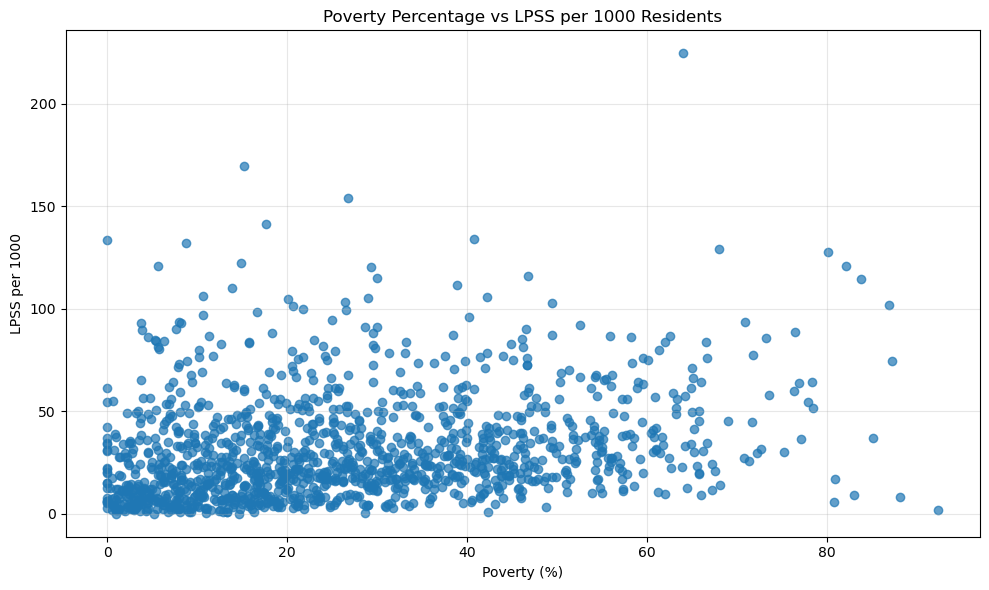

In [5]:
#Scatter Plot: Poverty % vs LPSS per 1000
plt.figure(figsize=(10, 6))
plt.scatter(df['PCT_POVERTY'], df['LPSS_PER1000'], alpha=0.7)
plt.title("Poverty Percentage vs LPSS per 1000 Residents")
plt.xlabel("Poverty (%)")
plt.ylabel("LPSS per 1000")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Project Assignment 5 11/24/2025
#Data Aggregation and Group Operations
#Grouping Data
#Pivot Tables and Cross-Tabulation

In [3]:
#Group neighborhoods by poverty status
import pandas as pd

df = pd.read_csv(r"C:\Users\jaden\Downloads\NeighborhoodFoodRetail.csv")

df.head()

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length
0,1,4.210100e+11,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.09770,3260.316044
1,2,4.210100e+11,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.88280,1736.152373
2,3,4.210100e+11,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.02734,1211.853466
3,4,4.210100e+11,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.99220,2057.362419
4,5,4.210100e+11,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.90630,4166.159591


In [5]:
group_poverty = df.groupby("HIGH_POVERTY")
group_poverty.size()

HIGH_POVERTY
No     587
Yes    740
dtype: int64

In [7]:
poverty_summary = group_poverty.agg({
    "PCT_POVERTY": "mean",
    "TOTAL_LPSS": "mean",
    "TOTAL_HPSS": "mean",
    "LPSS_PER1000": "mean",
    "HPSS_PER1000": "mean"
})

print("📌 Summary by Poverty Level:\n")
print(poverty_summary)

📌 Summary by Poverty Level:

              PCT_POVERTY  TOTAL_LPSS  TOTAL_HPSS  LPSS_PER1000  HPSS_PER1000
HIGH_POVERTY                                                                 
No               9.949014   24.392123    4.357449     24.994666      4.260800
Yes             39.666393   33.822973    3.332432     35.650725      3.387086


In [9]:
# 3. # Group by NON_RESIDENTIAL region
region_summary = df.groupby("NON_RESIDENTIAL")[["PCT_POVERTY",
                                               "LPSS_PER1000",
                                               "HPSS_PER1000"]].mean()

print(region_summary)

                 PCT_POVERTY  LPSS_PER1000  HPSS_PER1000
NON_RESIDENTIAL                                         
No                 26.558562     31.087562      3.817164
Yes                 9.888490           NaN           NaN


In [10]:
#APPLYING FUNCTIONS TO GROUPS(Used AI here)

In [11]:
def lowest_lpss(group):
    return group.nsmallest(2, "LPSS_PER1000")

worst_lpss = group_poverty.apply(lowest_lpss)

print("\nLOWEST LPSS PER POVERTY GROUP:\n")
print(worst_lpss)


LOWEST LPSS PER POVERTY GROUP:

                   OBJECTID       GEOID10 NON_RESIDENTIAL  TOTAL_LPSS  \
HIGH_POVERTY                                                            
No           552        553  4.210100e+11              No         0.0   
             934        935  4.210100e+11              No         0.0   
Yes          859        860  4.210100e+11              No         1.0   
             1304      1305  4.210100e+11              No         1.0   

                   LPSS_PER1000  TOTAL_HPSS  HPSS_PER1000  PCT_HPSS  \
HIGH_POVERTY                                                          
No           552       0.000000         0.0           0.0       0.0   
             934       0.000000         0.0           0.0       0.0   
Yes          859       0.407664         0.0           0.0       0.0   
             1304      1.031992         0.0           0.0       0.0   

                  HPSS_ACCESS SUPERMARKET_ACCESS  PCT_VEHICLE_AVAILABILITY  \
HIGH_POVERTY           

C:\Users\jaden\AppData\Local\Temp\ipykernel_18040\574894169.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  worst_lpss = group_poverty.apply(lowest_lpss)


In [12]:
#IMPUTING (REPLACING) VALUES USING GROUP MEDIANS
def replace_median(group):
    group["LPSS_PER1000"] = group["LPSS_PER1000"].median()
    group["HPSS_PER1000"] = group["HPSS_PER1000"].median()
    return group

df_median = group_poverty.apply(replace_median)

print("\nDATA AFTER MEDIAN REPLACEMENT:\n")
print(df_median.head())



DATA AFTER MEDIAN REPLACEMENT:

                 OBJECTID       GEOID10 NON_RESIDENTIAL  TOTAL_LPSS  \
HIGH_POVERTY                                                          
No           3          4  4.210100e+11              No        15.0   
             7          8  4.210100e+11              No        32.0   
             8          9  4.210100e+11              No        27.0   
             10        11  4.210100e+11              No        29.0   
             13        14  4.210100e+11              No        33.0   

                 LPSS_PER1000  TOTAL_HPSS  HPSS_PER1000   PCT_HPSS  \
HIGH_POVERTY                                                         
No           3       18.23298        2.75      2.359889  15.492958   
             7       18.23298        4.75      2.359889  12.925170   
             8       18.23298        3.25      2.359889  10.743802   
             10      18.23298        4.25      2.359889  12.781955   
             13      18.23298        3.25      2.

C:\Users\jaden\AppData\Local\Temp\ipykernel_18040\2095111098.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_median = group_poverty.apply(replace_median)


In [ ]:
#PIVOT TABLES

In [13]:
#median LPSS by Poverty × Supermarket Access(kept running into errors had to use AI)
pivot_lpss = df.pivot_table(
    index="HIGH_POVERTY",
    columns="SUPERMARKET_ACCESS",
    values="LPSS_PER1000",
    aggfunc="median"
)

print("\nPIVOT TABLE — MEDIAN LPSS:\n")
print(pivot_lpss)


PIVOT TABLE — MEDIAN LPSS:

SUPERMARKET_ACCESS         No        Yes
HIGH_POVERTY                            
No                  11.463845  19.480519
Yes                 24.086489  30.263778


In [15]:
#median HPSS by Region × Poverty
pivot_hpss = df.pivot_table(
    index="HIGH_POVERTY",
    columns="SUPERMARKET_ACCESS",
    values="HPSS_PER1000",
    aggfunc="median"
)

print(pivot_hpss)

SUPERMARKET_ACCESS        No       Yes
HIGH_POVERTY                          
No                  0.356633  3.086420
Yes                 0.763590  3.113989


NameError: name 'plt' is not defined

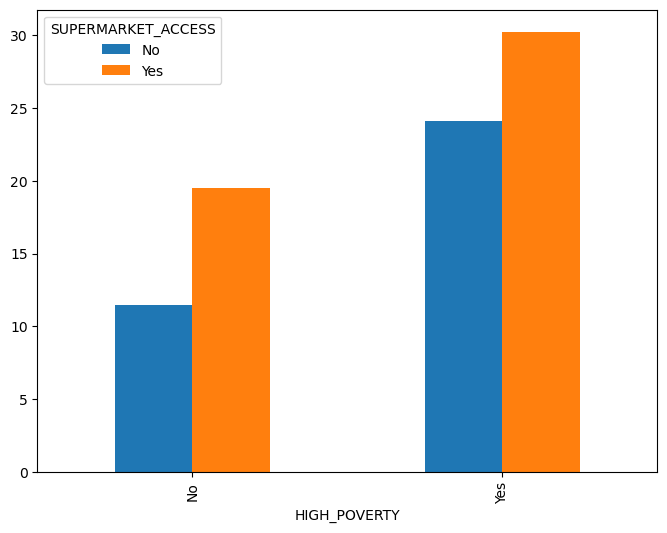

In [16]:
pivot_lpss.plot(kind="bar", figsize=(8,6))
plt.title("Median LPSS per 1000 by Poverty and Supermarket Access")
plt.xlabel("High Poverty")
plt.ylabel("Median LPSS per 1000")
plt.show()


In [ ]:
#CROSS-TABULATION

In [17]:
#Crosstab: Poverty × Supermarket Access
ct = pd.crosstab(df["HIGH_POVERTY"], df["SUPERMARKET_ACCESS"])
print("\nCROSSTAB — POVERTY × SUPERMARKET ACCESS:\n")
print(ct)


CROSSTAB — POVERTY × SUPERMARKET ACCESS:

SUPERMARKET_ACCESS   No  Yes
HIGH_POVERTY                
No                  125  459
Yes                 148  592


NameError: name 'plt' is not defined

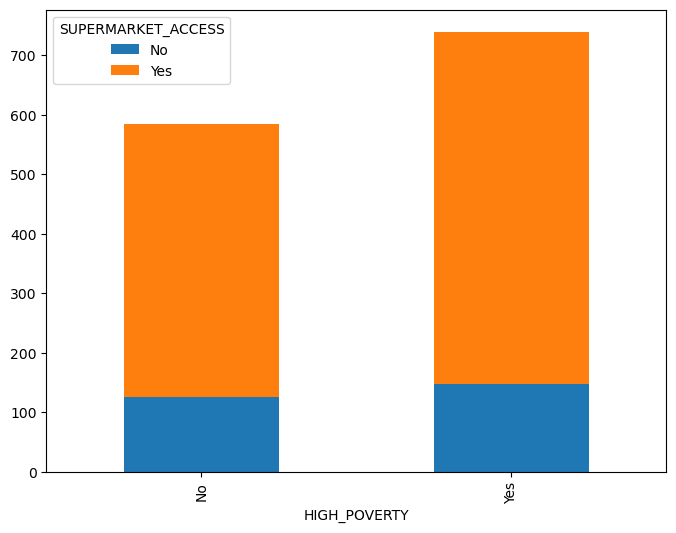

In [18]:
# Stacked Barplot: x = Poverty
ct.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Supermarket Access by Poverty Level")
plt.xlabel("High Poverty")
plt.ylabel("Count")
plt.show()


NameError: name 'plt' is not defined

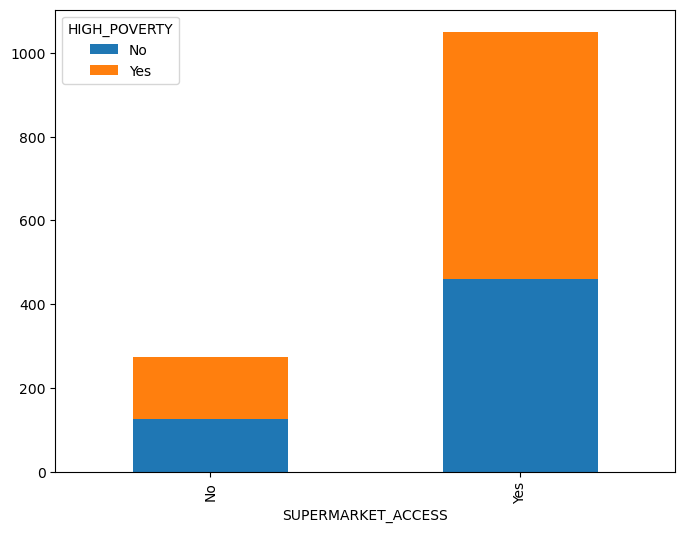

In [19]:
#Stacked Barplot: x = Supermarket Access
ct2 = pd.crosstab(df["SUPERMARKET_ACCESS"], df["HIGH_POVERTY"])

ct2.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Poverty Level by Supermarket Access")
plt.xlabel("Supermarket Access")
plt.ylabel("Count")
plt.show()

In [ ]:
# Project Assignment 6 12/8/2025
#adding additional tests that could help consolidate data
#I definitely used AI here I was lost as to what i could add

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("NeighborhoodFoodRetail.csv")
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [16]:
# clean
df['high_poverty'] = df['high_poverty'].astype(str).str.title()
df['supermarket_access'] = df['supermarket_access'].astype(str).str.title()
df[['lpss_per1000','hpss_per1000','pct_poverty']] = df[['lpss_per1000','hpss_per1000','pct_poverty']].apply(pd.to_numeric, errors='coerce')

# manual t-test
yes = df[df['high_poverty']=="Yes"]['hpss_per1000'].dropna().to_numpy()
no  = df[df['high_poverty']=="No"]['hpss_per1000'].dropna().to_numpy()

mean_yes = yes.mean()
mean_no = no.mean()

var_yes = yes.var(ddof=1)
var_no = no.var(ddof=1)

n_yes = len(yes)
n_no = len(no)

In [14]:
#Welch's Test
t_stat = (mean_yes - mean_no) / np.sqrt(var_yes/n_yes + var_no/n_no)

dfree = (var_yes/n_yes + var_no/n_no)**2 / (
    (var_yes**2)/(n_yes**2*(n_yes-1)) +
    (var_no**2)/(n_no**2*(n_no-1))
)

p_value = 2*(1 - 0.5*(1 + erf(abs(t_stat)/sqrt(2))))

print(f"t = {t_stat:.3f}, df = {dfree:.1f}, p = {p_value:.4f}")
print(f"Mean (High Poverty = Yes): {mean_yes:.3f}")
print(f"Mean (High Poverty = No):  {mean_no:.3f}\n")

t = -3.173, df = 839.4, p = 0.0015
Mean (High Poverty = Yes): 3.387
Mean (High Poverty = No):  4.261



In [15]:
# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in HPSS_PER1000\n"
          "between high-poverty and non-high-poverty neighborhoods.\n"
          "This suggests that food security risk differs by poverty level.\n")
else:
    print("No statistically significant difference in HPSS_PER1000\n"
          "between high-poverty and non-high-poverty neighborhoods.\n"
          "Poverty level does not appear strongly related to food security risk.\n")


There is a statistically significant difference in HPSS_PER1000
between high-poverty and non-high-poverty neighborhoods.
This suggests that food security risk differs by poverty level.



In [17]:
# Chi test

In [18]:
ct = pd.crosstab(df['high_poverty'], df['supermarket_access'])
observed = ct.to_numpy()

row_sums = observed.sum(axis=1)
col_sums = observed.sum(axis=0)
total = observed.sum()

expected = np.outer(row_sums, col_sums) / total

chi2 = ((observed - expected)**2 / expected).sum()

print("Chi-square =", round(chi2, 3))
print("Observed:\n", ct, "\n")
print("Expected:\n", expected, "\n")

Chi-square = 862.058
Observed:
 supermarket_access  Nan   No  Yes
high_poverty                     
Nan                   8    0    1
No                    3  125  459
Yes                   0  148  592 

Expected:
 [[7.41017964e-02 1.83907186e+00 7.08682635e+00]
 [4.83308383e+00 1.19948353e+02 4.62218563e+02]
 [6.09281437e+00 1.51212575e+02 5.82694611e+02]] 



In [19]:
# Interpretation
if chi2 > 6:   
    print("There is evidence that supermarket access differs\n"
          "between high-poverty and low-poverty neighborhoods.\n"
          "This supports the idea of unequal food retail distribution.\n")
else:
    print("Supermarket access does NOT differ strongly\n"
          "between high- and low-poverty neighborhoods.\n")

There is evidence that supermarket access differs
between high-poverty and low-poverty neighborhoods.
This supports the idea of unequal food retail distribution.



In [20]:
#CORRELATION: PCT_POVERTY vs LPSS_PER1000

In [21]:
mask = df['pct_poverty'].notna() & df['lpss_per1000'].notna()
r = np.corrcoef(df['pct_poverty'][mask], df['lpss_per1000'][mask])[0,1]

print(f"Correlation r = {r:.3f}\n")

if abs(r) < 0.1:
    print("Almost no linear relationship between neighborhood poverty\n"
          "and LPSS_PER1000 (food insecurity risk proxy).\n")
elif abs(r) < 0.3:
    print("Weak relationship — poverty may have some influence\n"
          "but it is not a strong predictor.\n")
elif abs(r) < 0.5:
    print("Moderate relationship — poverty is associated with food insecurity risk.\n")
else:
    print("Strong relationship — poverty level is strongly linked to food insecurity risk.\n")

Correlation r = 0.263

Weak relationship — poverty may have some influence
but it is not a strong predictor.



In [22]:
#ONE-WAY ANOVA: LPSS_PER1000 by Region
#struggled trying get regions of philly in here used AI

In [24]:
if "philly_region" in df.columns:
    groups = [g['lpss_per1000'].dropna().to_numpy() 
              for _, g in df.groupby('philly_region')]
    
    gm = df['lpss_per1000'].mean()

    ssb = sum(len(g)*(g.mean()-gm)**2 for g in groups)
    ssw = sum(((g - g.mean())**2).sum() for g in groups)

    dfb = len(groups)-1
    dfw = sum(len(g) for g in groups) - len(groups)

    msb = ssb/dfb
    msw = ssw/dfw

    F = msb/msw

    print(f"F = {F:.3f}, df_between = {dfb}, df_within = {dfw}\n")
    if F > 3:
        print("At least one Philadelphia region has significantly different\n"
              "LPSS_PER1000 values. This means food insecurity risk varies by region.\n")
    else:
        print("No strong evidence that LPSS_PER1000 differs by region.\n")
else:
    print("Column 'philly_region' not found — ANOVA skipped.\n")

Column 'philly_region' not found — ANOVA skipped.



In [25]:
#LINEAR REGRESSION: LPSS_PER1000 ~ PCT_POVERTY + HPSS_PER1000 
#Used AI here 

In [26]:
mask = df['pct_poverty'].notna() & df['hpss_per1000'].notna() & df['lpss_per1000'].notna()

X = np.column_stack([np.ones(sum(mask)),
                     df['pct_poverty'][mask],
                     df['hpss_per1000'][mask]])
Y = df['lpss_per1000'][mask].to_numpy()

beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)

In [27]:
print("Intercept:", round(beta[0], 3))
print("Coefficient (pct_poverty):", round(beta[1], 3))
print("Coefficient (hpss_per1000):", round(beta[2], 3), "\n")

print("INTERPRETATION:")
print("- pct_poverty coefficient → How much LPSS increases per 1% increase in poverty")
print("- hpss_per1000 coefficient → Relationship between high-priority store density and LPSS")
print("\nHigher coefficients mean stronger relationships with food insecurity risk.")

Intercept: 8.363
Coefficient (pct_poverty): 0.417
Coefficient (hpss_per1000): 3.052 

INTERPRETATION:
- pct_poverty coefficient → How much LPSS increases per 1% increase in poverty
- hpss_per1000 coefficient → Relationship between high-priority store density and LPSS

Higher coefficients mean stronger relationships with food insecurity risk.
